In [1]:
#Libraries to import dtype file
import json

#Libraries for handling dataframes
import numpy as np
import pandas as pd

#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Importing Scaling and PCA libraries from sklearn for visualization
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

# Fancy progress bars
from tqdm import tqdm

#Creating train/test sets
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

#Setting pandas to display the necessary information
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

# EDA part 1

Table of Contents:
 1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Initial Exploration](#Initial-Exploration)
    - [Univariate Analysis](#Univariate-Analysis)
    - [Bivariate Analysis](#Bivariate-Analysis)
    
 2. [Data Wrangling](#Data-Wrangling)
    - [Feature Engineering](#Feature-engineering)
    - [Test/Train Split](#Test-Train-Split)
---

In the context of an iterative data science framework, we are embarking on the initial stage of EDA, starting with this notebook. Our primary focus will be to conduct an in-depth analysis of the classes within the dataset and explore their relationships with one another.

To provide a brief recap, the previous notebook titled `"Data Loading and Cleaning"` extensively covered the details surrounding the dataset's acquisition, as well as the meticulous cleaning processes applied to ensure data integrity and quality.

Building upon this foundation, our current objective is to delve deeper into the dataset, unraveling valuable insights regarding the different classes and their interdependencies. By scrutinizing the relationships between these classes, we aim to gain a comprehensive understanding of the dataset's composition and characteristics.

As we embark on this EDA journey, we remain mindful of the iterative nature of the data science process, knowing that further notebooks and analyses will follow to refine our understanding and drive meaningful outcomes.

In [2]:
with open('data/dtypes.json', 'r') as json_file:
    dtypes = json.load(json_file)

#Importing the clean data
clean_data = pd.read_csv('data/WorkWeek_CleanData.csv',dtype=dtypes)

In [3]:
#Sanity Check
clean_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053039 entries, 0 to 2053038
Columns: 79 entries, Dst Port to Label
dtypes: float32(45), int32(32), int64(1), object(1)
memory usage: 634.4+ MB


# Exploratory Data Analysis

## Initial Exploration

Let's kick off by familiarizing ourselves with the dimensions of our dataset. We'll explore the number of classes available, their distribution, and how well-represented they are within the dataset.

In [4]:
#Size of our data
print(f'Our dataset contains {clean_data.shape[0]} rows and {clean_data.shape[1]} features')

Our dataset contains 2053039 rows and 79 features


In [5]:
clean_data.sample(5)

,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd RST Flags,Bwd RST Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label
1651547,443,6,118862217,87,144,3655.0,162981.0,584.0,0.0,42.011494,112.990067,1430.0,0.0,1131.812500,545.421692,1401.925781,1.943427,5.167922e+05,5.440098e+06,58936368.0,1.0,118862216.0,1382118.75,8.867155e+06,58936368.0,78.0,118768952.0,8.305521e+05,6.896848e+06,59022720.0,1.0,19,54,0,0,1752,2892,0.731940,1.211487,0.0,1430.0,721.367981,685.406494,4.697821e+05,0,2,0,73,230,0,0,1.655172,721.367981,42.011494,1131.812500,0,0,0,22703,17,1743647,0,15,0,705,8192,419,19,20,913271.0,1169577.25,1740287.0,86255.0,58471056.0,658046.3125,58936368.0,58005748.0,118862217,BENIGN
841464,80,6,166989,7,7,366.0,11595.0,366.0,0.0,52.285713,138.334991,5792.0,0.0,1656.428589,2118.227295,71627.468750,83.837860,1.284531e+04,3.796904e+04,138289.0,1.0,166989.0,27831.50,6.053605e+04,150987.0,1.0,152707.0,2.545117e+04,5.555670e+04,138289.0,9.0,1,1,2,0,220,232,41.918930,41.918930,0.0,5792.0,854.357117,1665.084839,2.772508e+06,1,2,2,2,12,0,0,1.000000,854.357117,52.285713,1656.428589,0,0,0,11595,5,26352272,0,26,0,828,29200,235,1,20,0.0,0.00,0.0,0.0,0.0,0.0000,0.0,0.0,166989,DoS Hulk
208795,53,17,60902,1,1,31.0,47.0,31.0,31.0,31.000000,0.000000,47.0,47.0,47.000000,0.000000,1280.746094,32.839645,6.090200e+04,0.000000e+00,60902.0,60902.0,0.0,0.00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,8,8,16.419823,16.419823,31.0,47.0,39.000000,11.313708,1.280000e+02,0,0,0,0,0,0,0,1.000000,39.000000,31.000000,47.000000,0,0,0,0,0,0,0,15,0,23,0,0,0,8,0.0,0.00,0.0,0.0,0.0,0.0000,0.0,0.0,0,BENIGN
906830,53,17,23937,1,1,47.0,131.0,47.0,47.0,47.000000,0.000000,131.0,131.0,131.000000,0.000000,7436.186523,83.552658,2.393700e+04,0.000000e+00,23937.0,23937.0,0.0,0.00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,8,8,41.776329,41.776329,47.0,131.0,89.000000,59.396969,3.528000e+03,0,0,0,0,0,0,0,1.000000,89.000000,47.000000,131.000000,0,0,0,0,0,0,0,23,0,65,0,0,0,8,0.0,0.00,0.0,0.0,0.0,0.0000,0.0,0.0,0,BENIGN
430386,53,17,12064060,2,2,96.0,160.0,52.0,44.0,48.000000,5.656854,108.0,52.0,80.000000,39.597980,21.220053,0.331563,4.021353e+06,6.186101e+06,11164436.0,438817.0,11625243.0,11625243.00,0.000000e+00,11625243.0,11625243.0,11603253.0,1.160325e+07,0.000000e+00,11603253.0,11603253.0,0,0,0,0,16,16,0.165782,0.165782,44.0,108.0,64.000000,29.574764,8.746667e+02,0,0,0,0,0,0,0,1.000000,64.000000,48.000000,80.000000,0,0,0,0,0,0,0,24,0,40,0,0,1,8,460807.0,0.00,460807.0,460807.0,11164436.0,0.0000,11164436.0,11164436.0,0,BENIGN


Our main goal is to classify network connections as either benign or part of an attack. To get started, we'll check out how many different labels we have in our dataset. This will give us an idea of the various classes our model will learn from, helping us understand the diversity of network attacks.

Next up, we'll look at the distribution of the classes (Benign vs. Attack) in our dataset. This is important because it tells us whether we have a good balance between benign and attack instances. If things are too skewed one way, our model might struggle to make accurate predictions.

In [6]:
clean_data.groupby('Label').size().sort_values(ascending=False)

Label
BENIGN                        1586082
PortScan                       159053
DoS Hulk                       158470
DDoS                            95144
Port_scan                       33056
DoS GoldenEye                    7567
DoS slowloris                    4001
FTP-Patator                      3973
SSH-Patator                      2980
DoS Slowhttptest                 1742
Bot                               738
Web Attack - Brute Force          151
Infiltration                       32
Web Attack - XSS                   27
Web Attack - Sql Injection         12
Heartbleed                         11
dtype: int64

<Axes: ylabel='Label'>

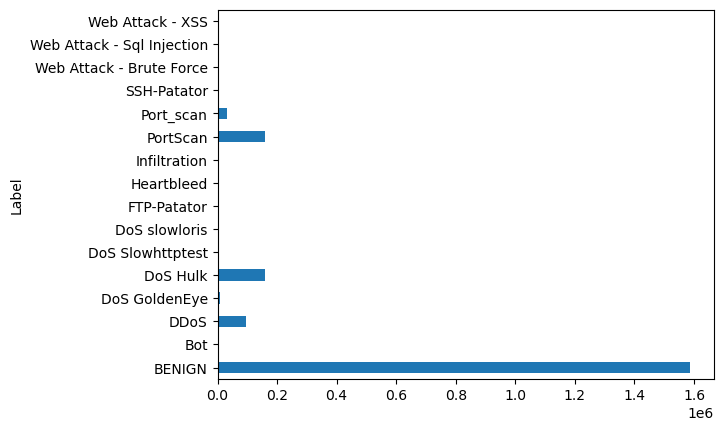

In [7]:
#Checking class balance
clean_data.groupby('Label').size().plot(kind='barh')

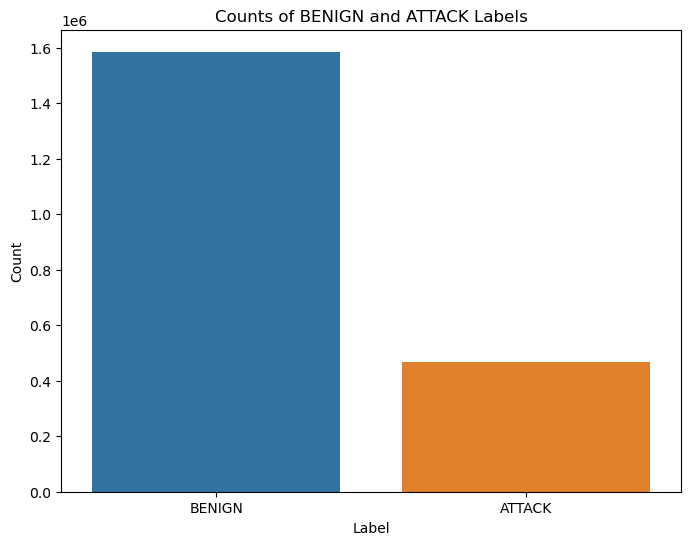

In [8]:
# Calculate the counts for 'BENIGN' and other labels
benign_count = clean_data[clean_data['Label'] == 'BENIGN']['Label'].value_counts().sum()
attack_count = clean_data[clean_data['Label'] != 'BENIGN']['Label'].value_counts().sum()

# Create a DataFrame to hold the counts
counts = pd.DataFrame({'Label': ['BENIGN', 'ATTACK'], 'Count': [benign_count, attack_count]})

# Create the bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Label', y='Count', data=counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Counts of BENIGN and ATTACK Labels')
plt.show()

In [9]:
print(f'The ratio of attacks to benign conections is {round(attack_count/benign_count,3)}')

The ratio of attacks to benign conections is 0.294


During our initial exploration, we discovered several types of attacks present in our network dataset:

- **Bot**: Automated web requests used for manipulation, fraud, or disruption of websites, applications, APIs, or end-users.
- **DDoS**: Multiple systems flooding the bandwidth or resources of a targeted system to cause denial of service.
- **DoS GoldenEye**: Denial-of-service attack using the GoldenEye tool.
- **DoS Hulk**: Denial-of-service attack using the Hulk tool.
- **DoS Slowhttptest**: Denial-of-service attack using the SlowHTTPtest tool.
- **DoS Slowloris**: Denial-of-service attack using the slowloris tool.
- **FTP-Patator**: Brute force FTP attacks using the patator tool.
- **Heartbleed**: A serious vulnerability in the popular OpenSSL cryptographic software library.
- **Infiltration**: Malicious software attempting to enter and/or damage a user's computer.
- **PortScan**: A technique hackers use to discover open doors or weak points in a network.
- **Port_scan**: A port scan implemented by the research team for CRiSIS 2022, labeled differently due to its unique characteristics.
- **SSH-Patator**: Brute force SSH attacks using the patator tool.
- **Web Attack - Brute Force**: Trial-and-error guessing of login info, encryption keys, or finding hidden web pages.
- **Web Attack - Sql Injection**: Insertion of a malicious SQL query via client input to the application.
- **Web Attack - XSS**: Sending malicious code through a web application, typically as a browser-side script, to another user.

Despite having different types of attacks in our data, each attack type represents a much smaller proportion compared to the benign packets captured in the dataset. This is a crucial observation to consider when dividing our dataset into training, test, and validation sets. To ensure our model learns the underlying interactions of our data effectively, we need to provide it with examples of each attack type and minimize skewness in the data.

Balancing the representation of different attack types in our training set will be essential in helping our model make accurate predictions for network intrusion detection. By addressing this skewness, we create a more robust model capable of understanding the intricacies of the data and better distinguishing between benign and attack packets.

### Univariate Analysis

Having gained an understanding of how our target variable is distributed throughout the dataset, our next step is to examine the distribution of each feature individually. To achieve this, I utilized histograms with 'rice' bins, ensuring both visual clarity and computational efficiency. Additionally, we will analyze various statistics, such as mean, variance, 25th percentile, etc., to gain insights into the composition of each feature within our dataset. This comprehensive exploration will provide us with a clearer picture of how each feature behaves on its own, helping us make informed decisions during the data analysis and modeling process.

In [10]:
numeric_columns = clean_data.select_dtypes(include='number').columns.tolist()

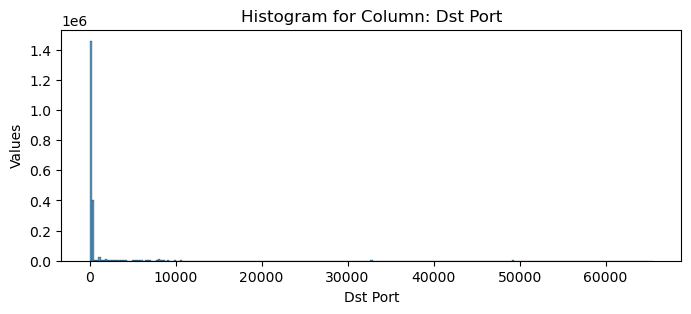

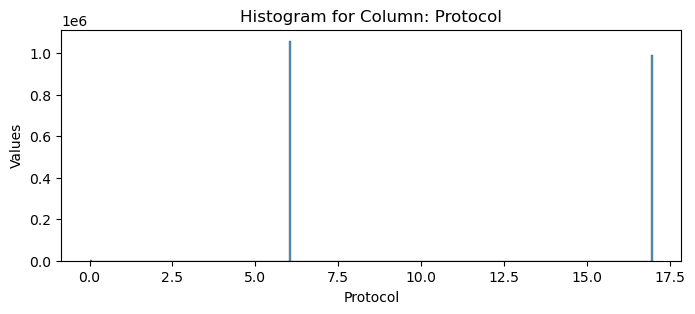

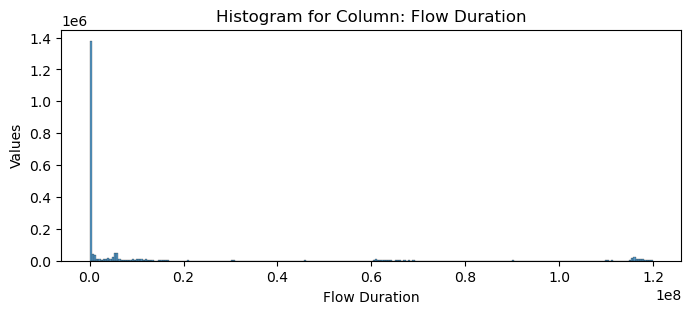

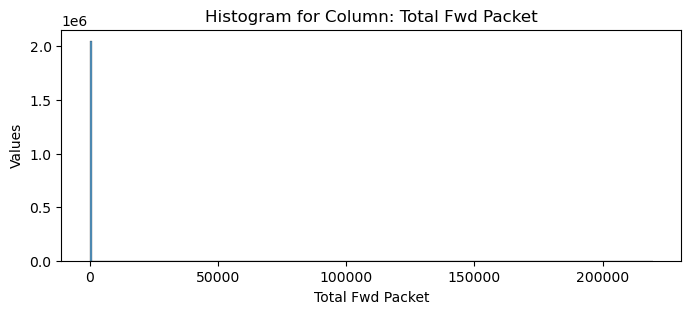

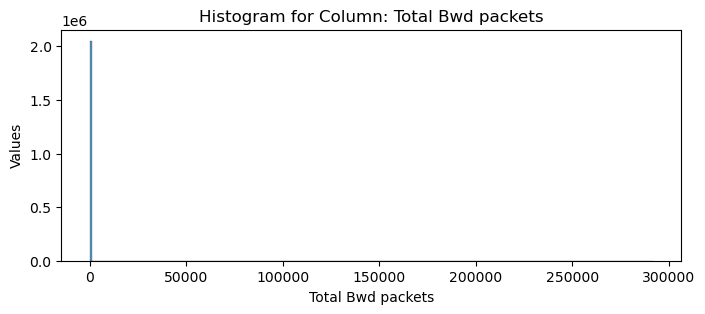

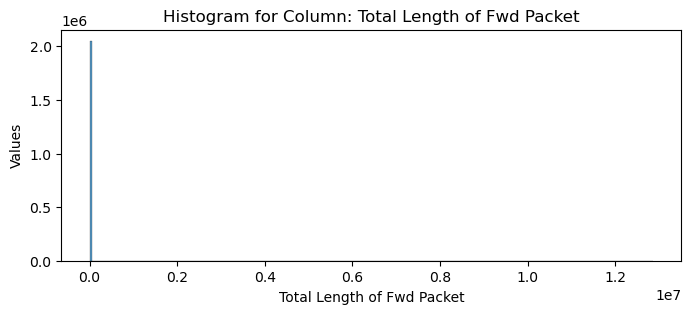

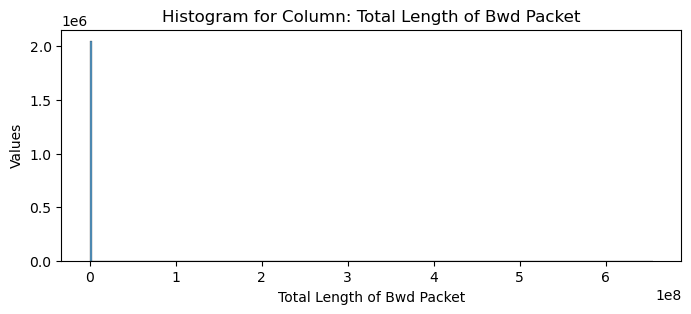

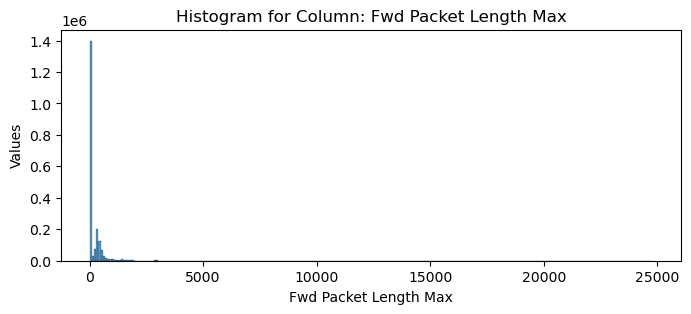

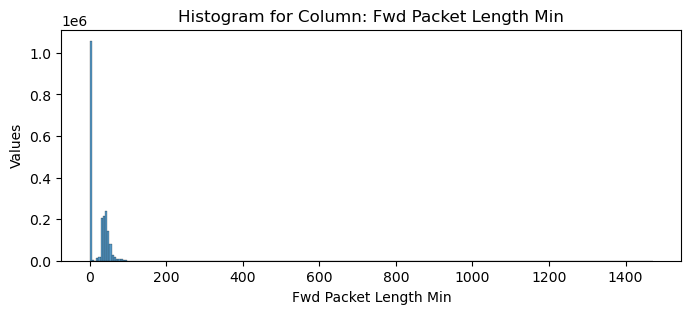

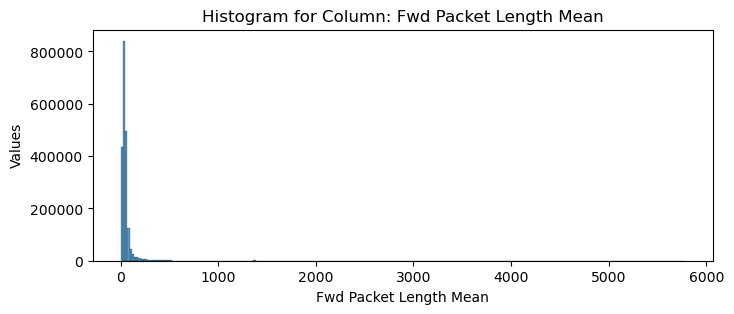

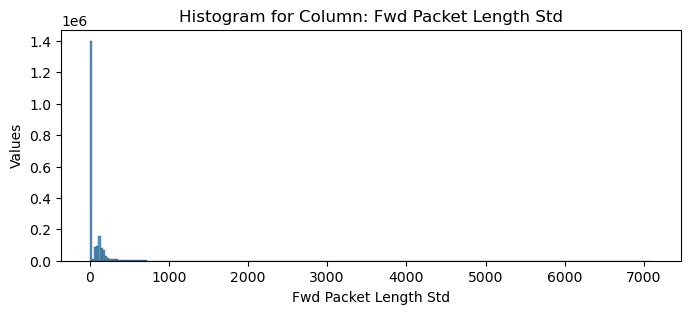

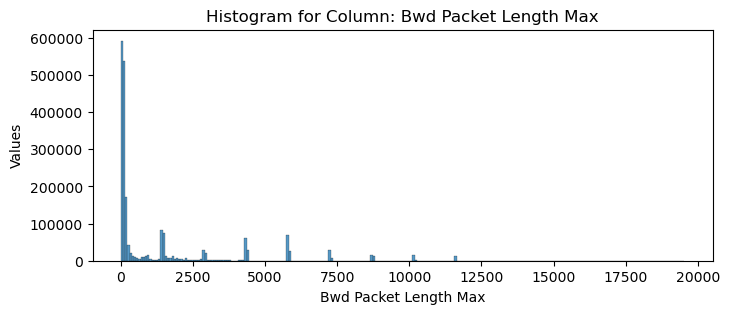

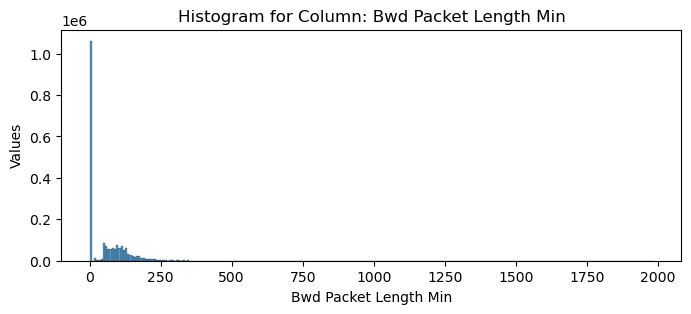

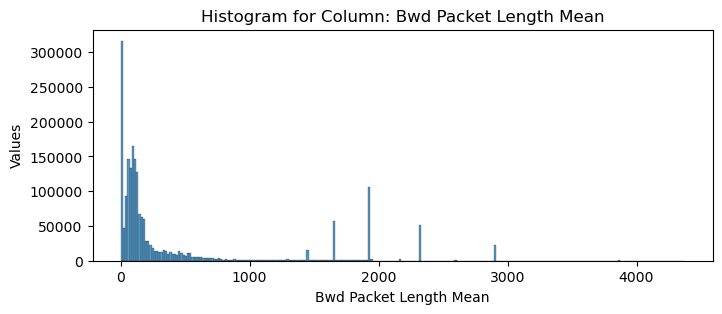

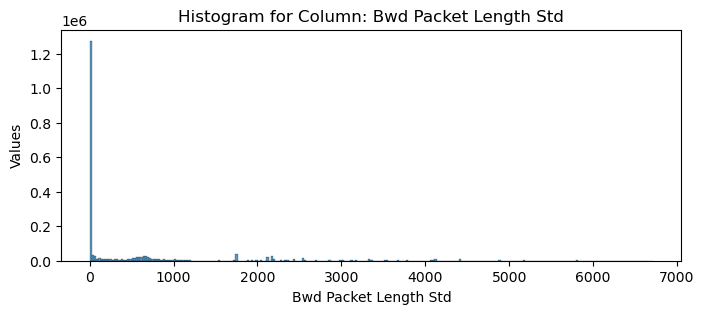

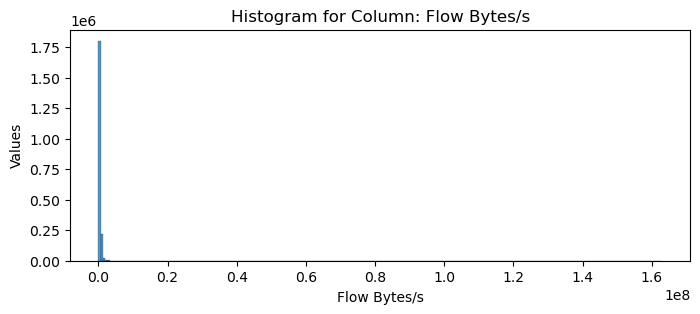

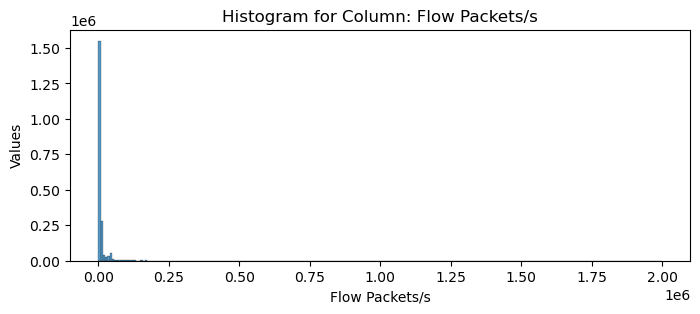

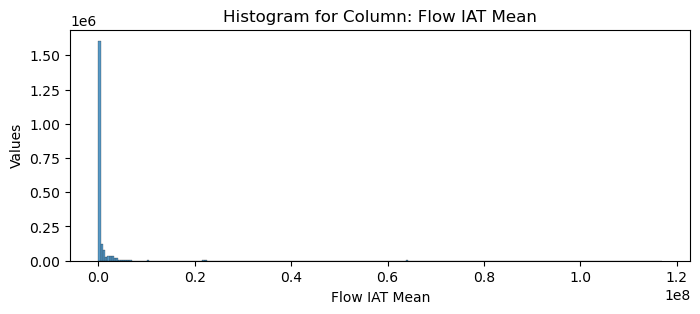

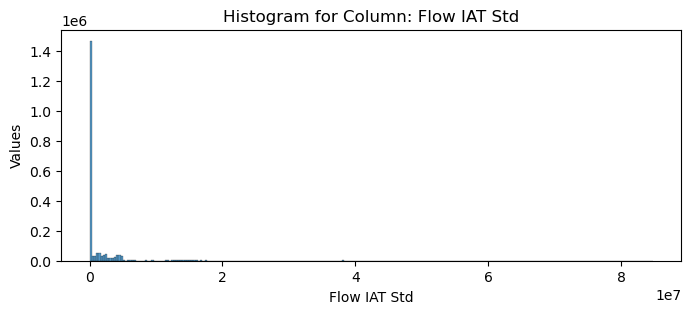

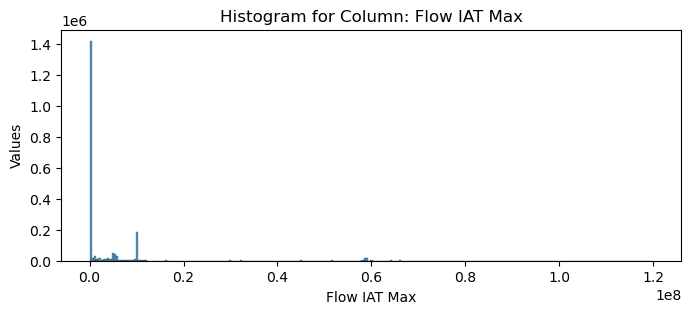

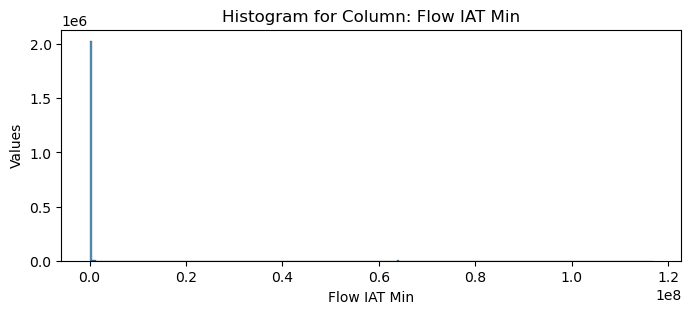

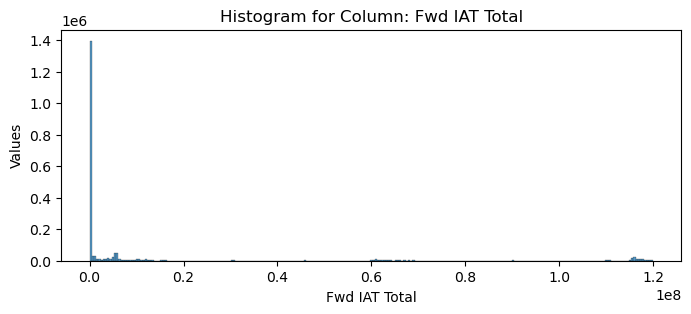

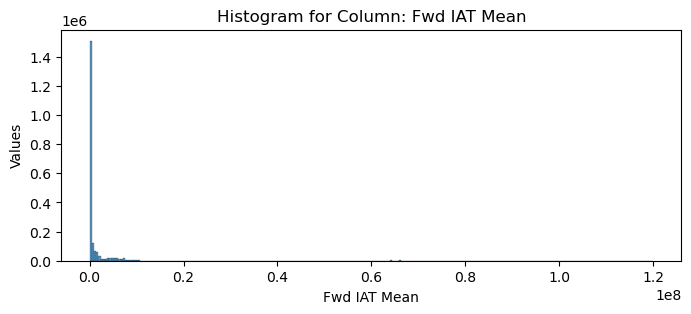

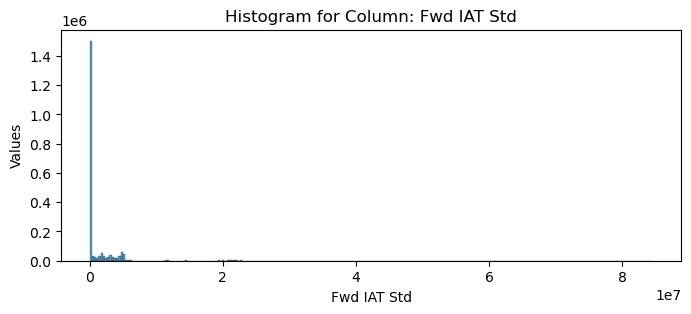

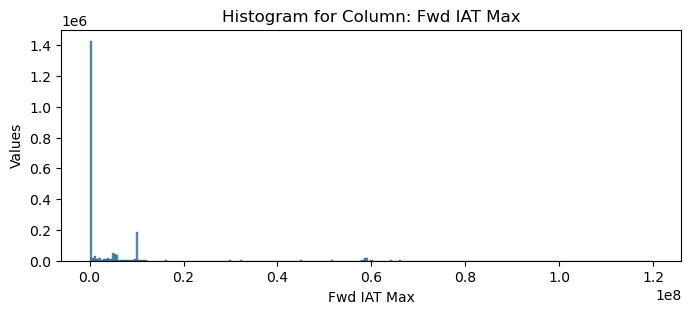

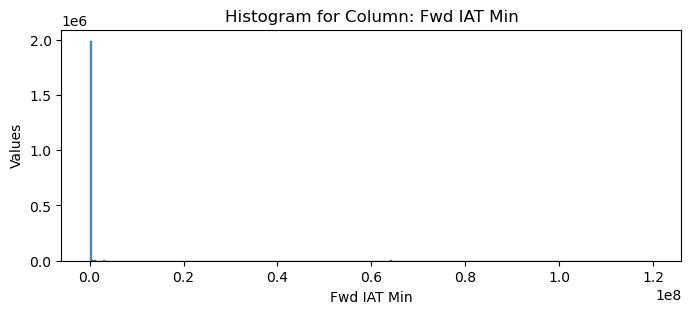

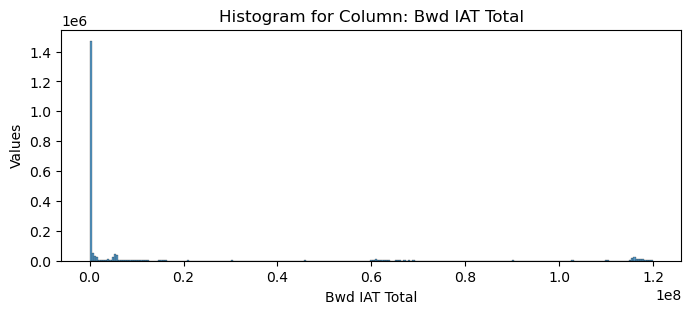

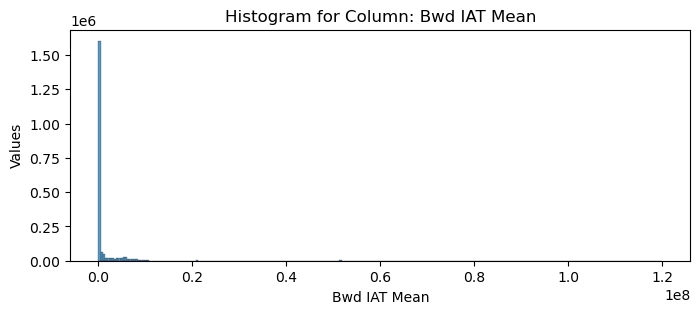

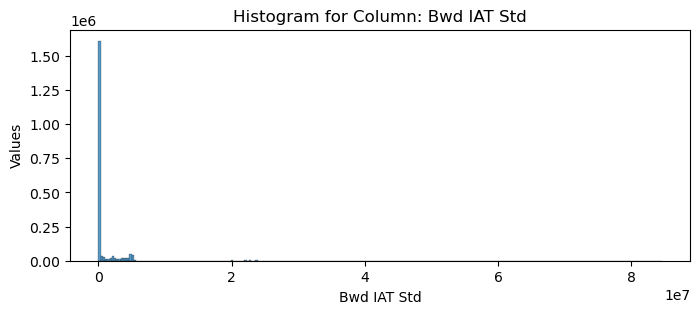

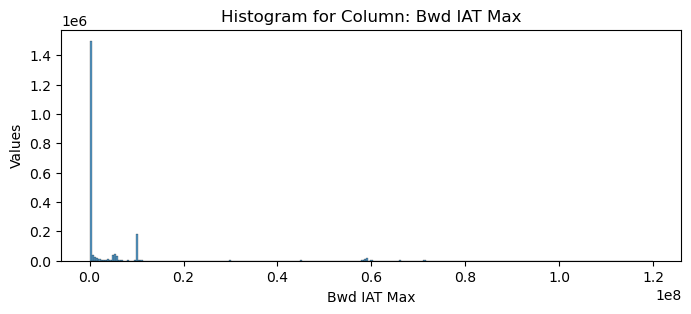

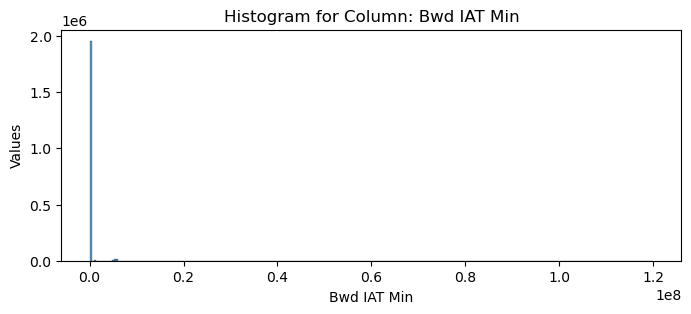

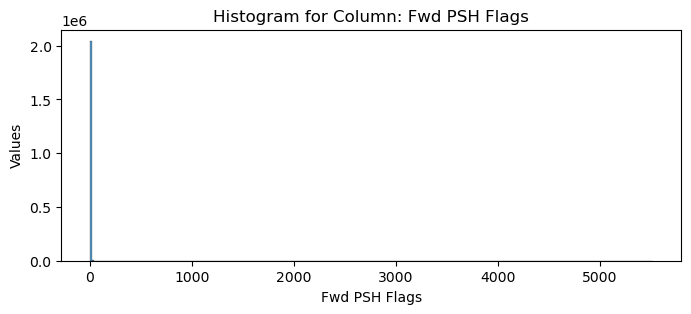

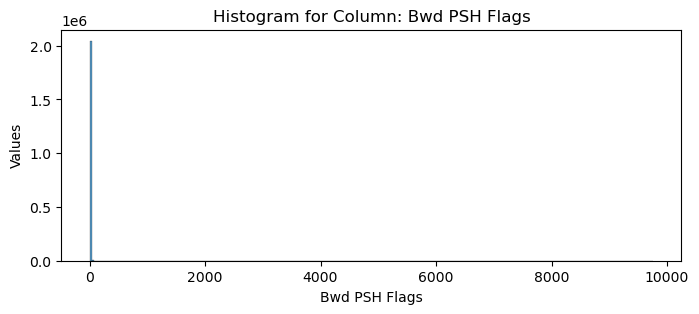

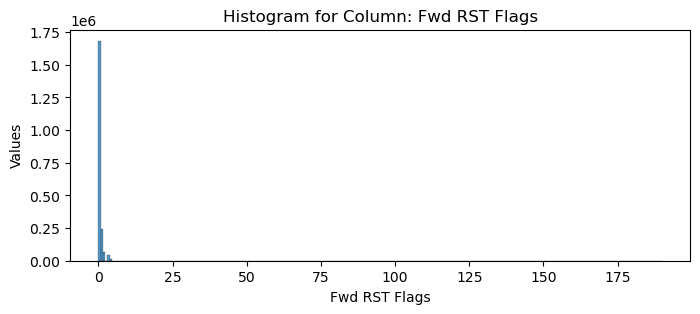

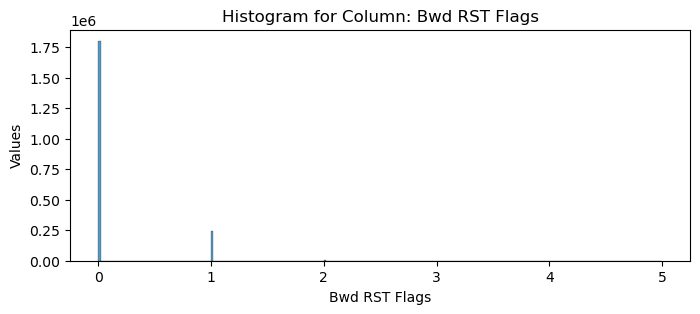

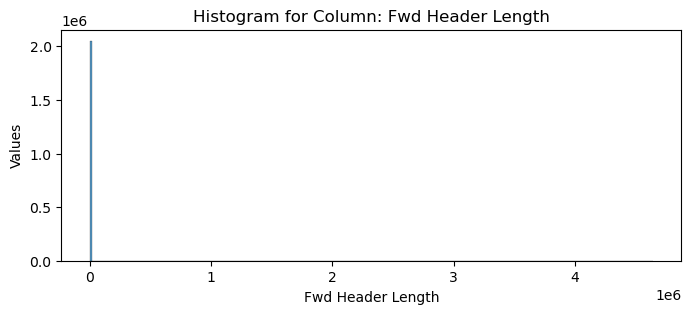

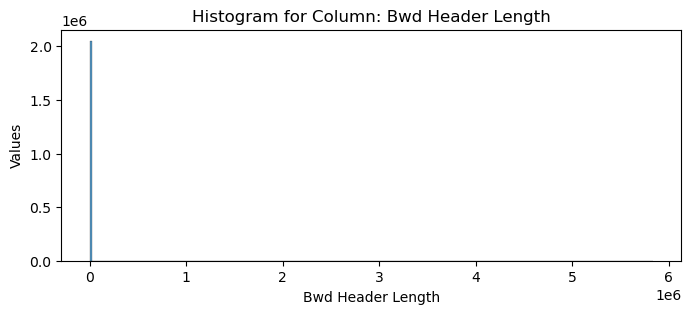

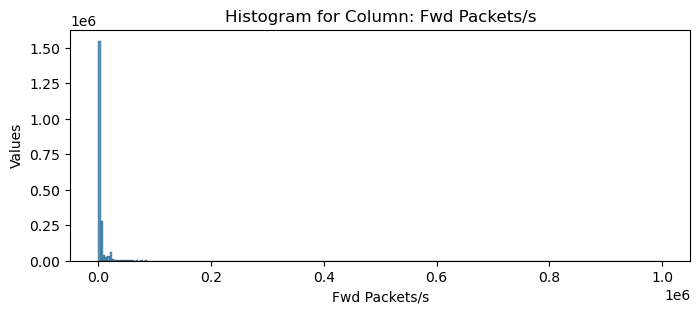

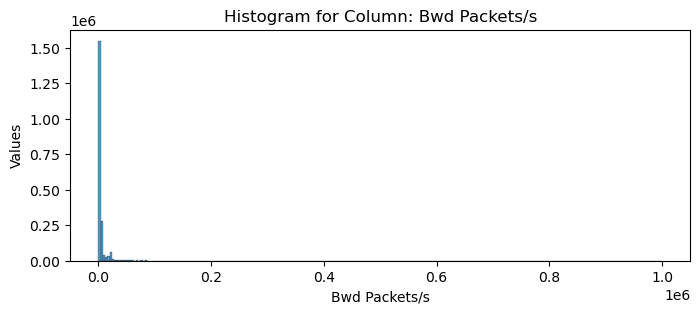

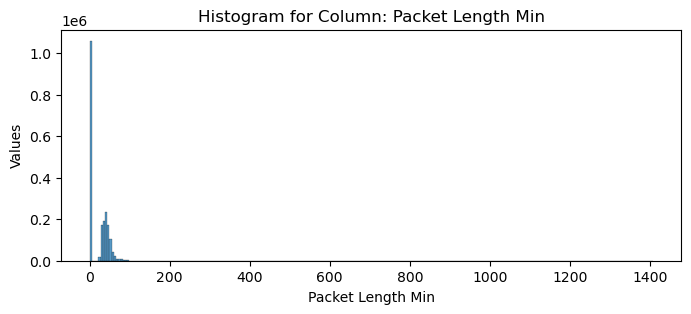

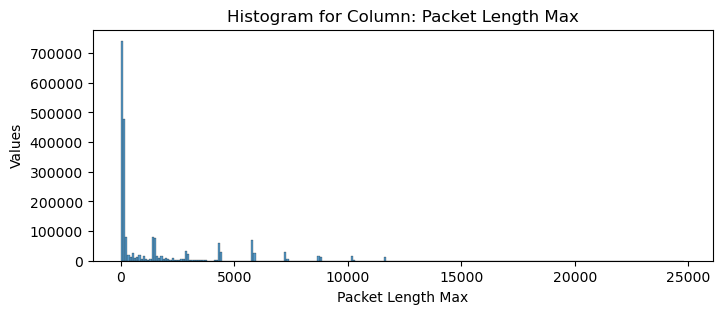

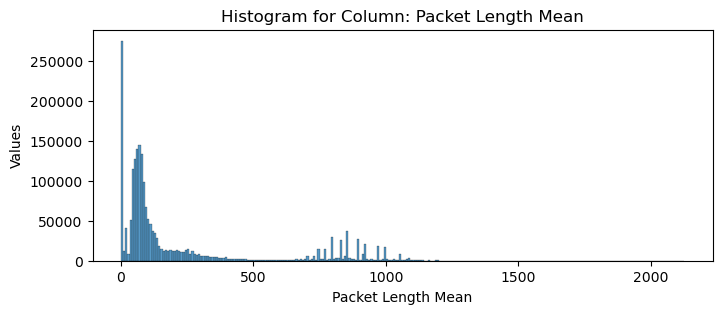

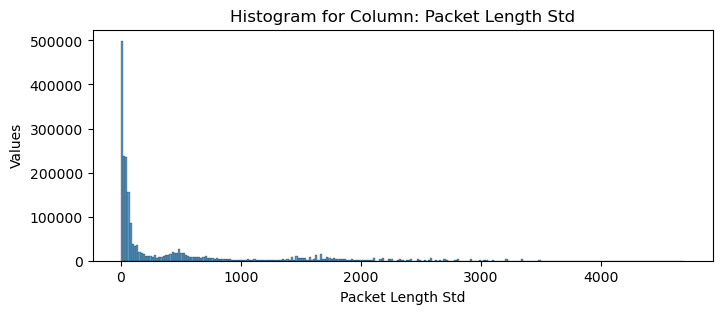

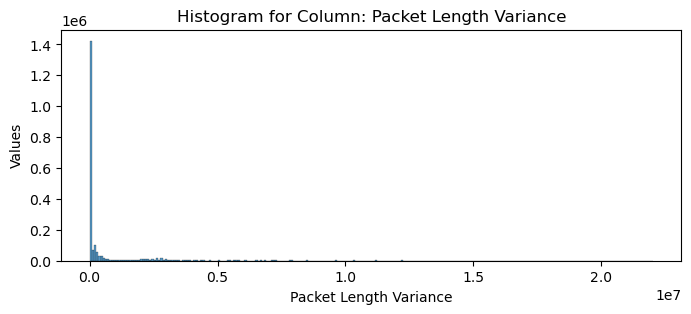

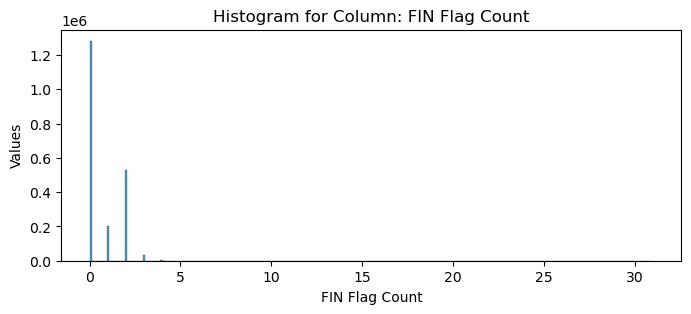

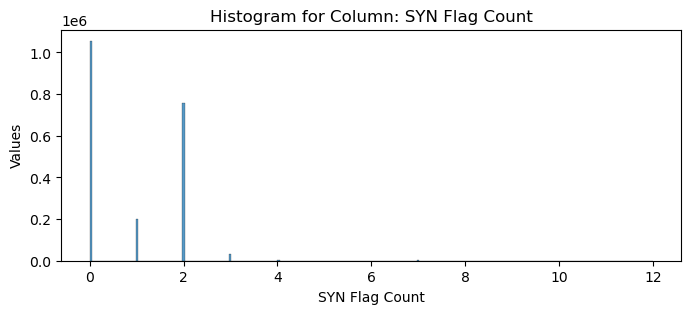

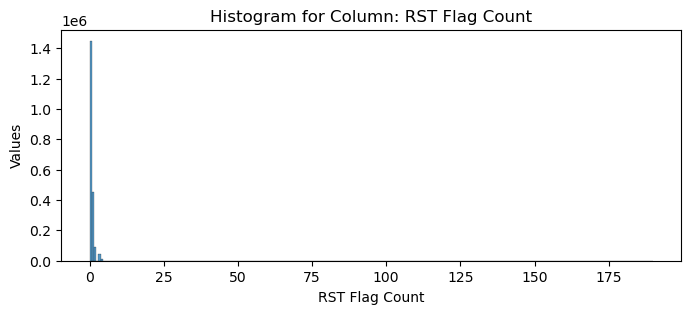

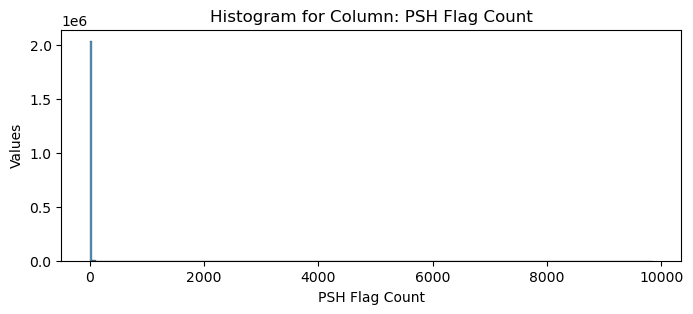

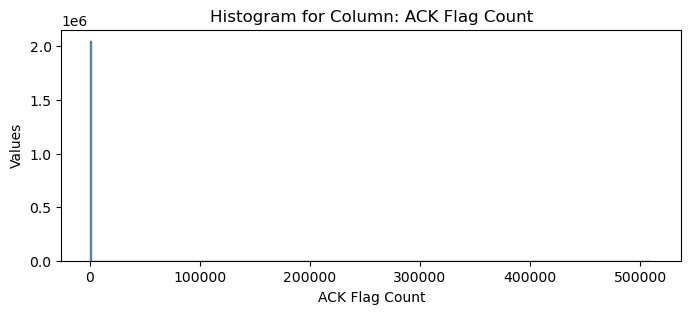

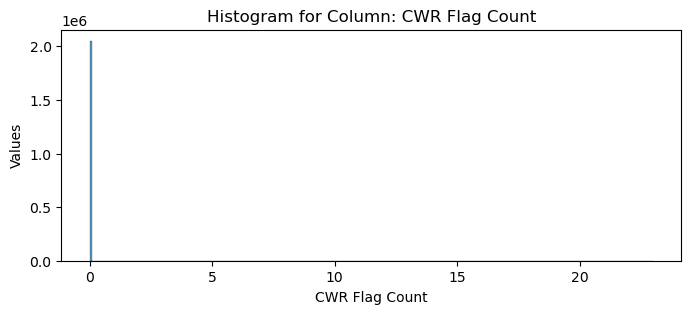

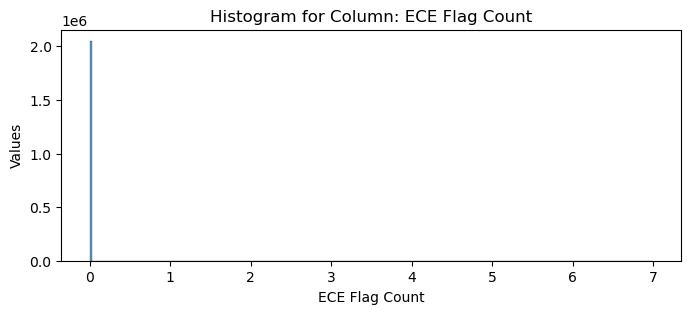

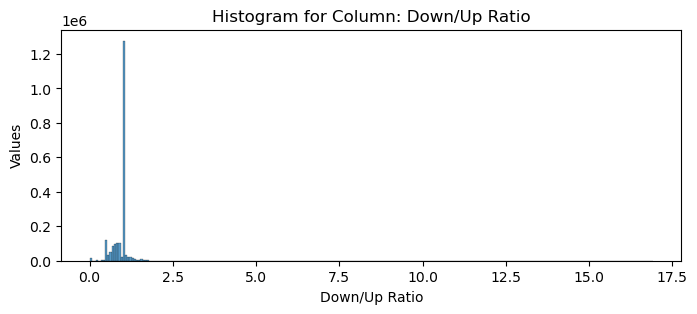

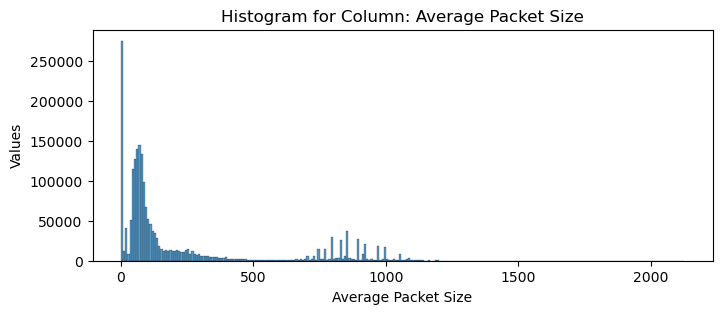

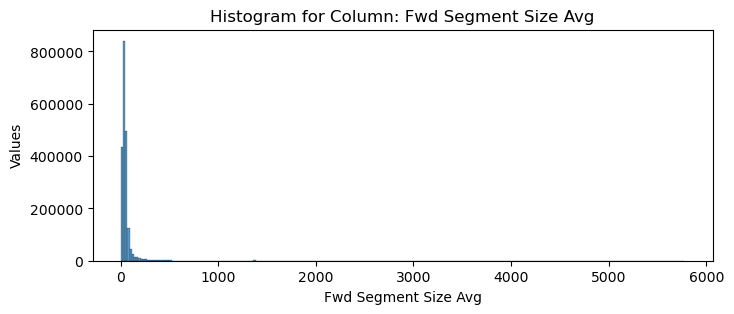

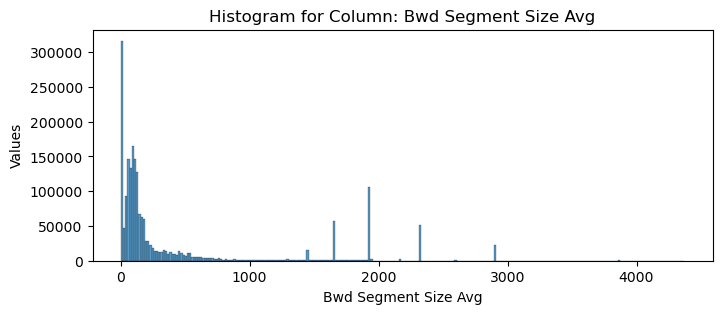

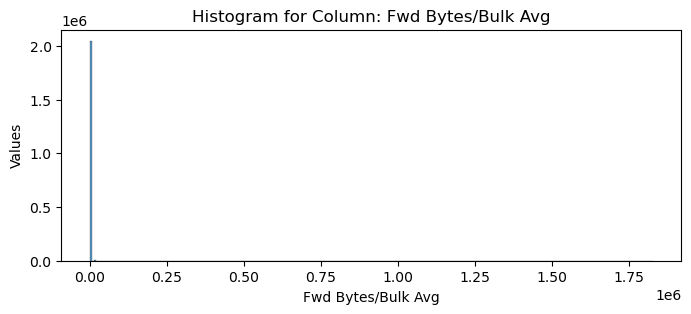

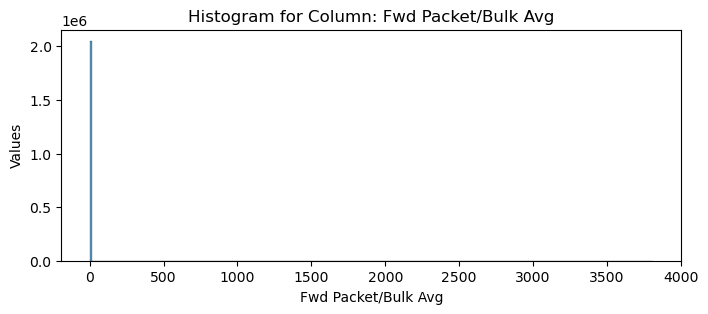

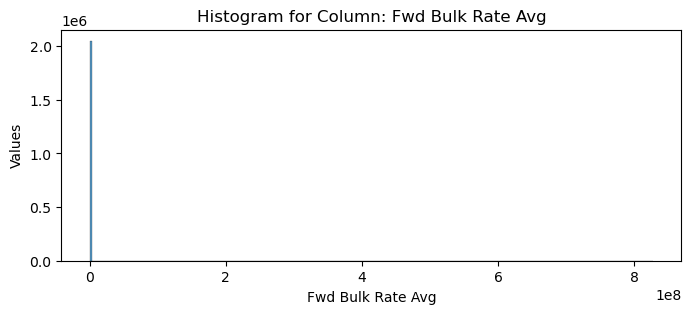

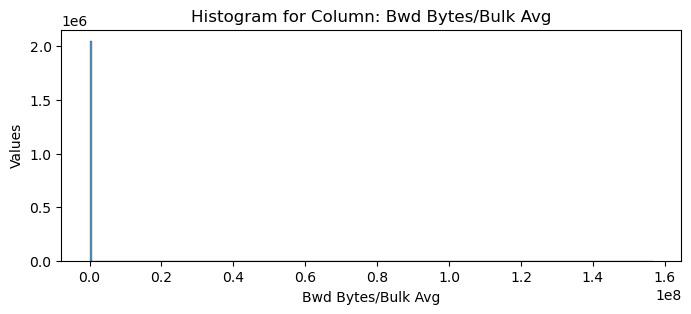

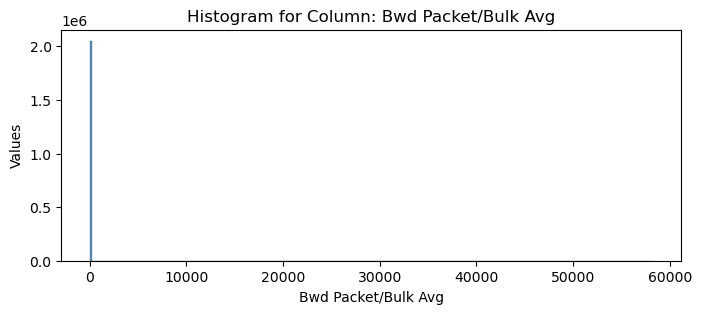

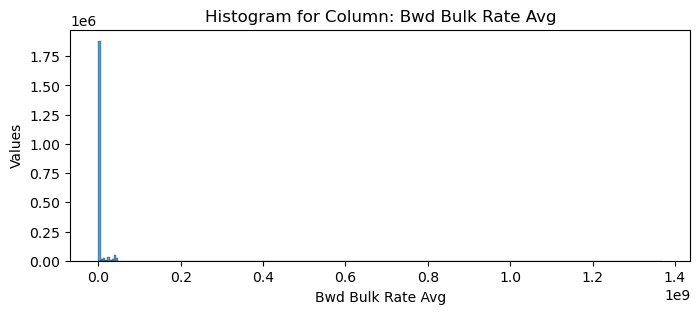

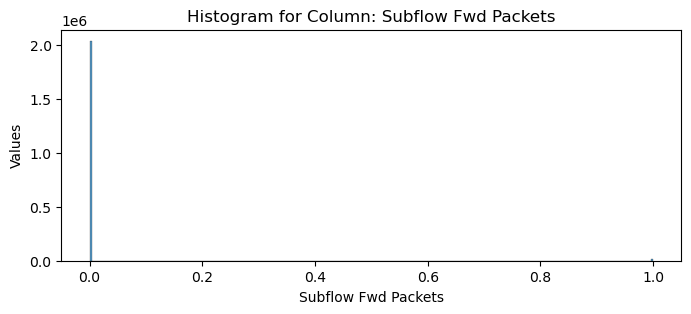

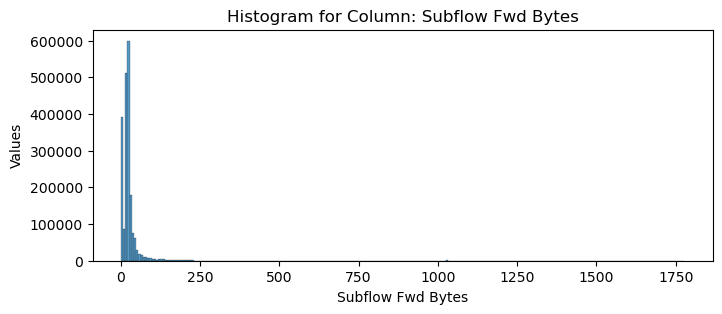

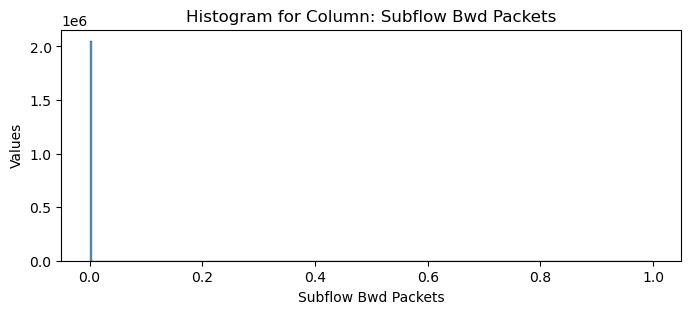

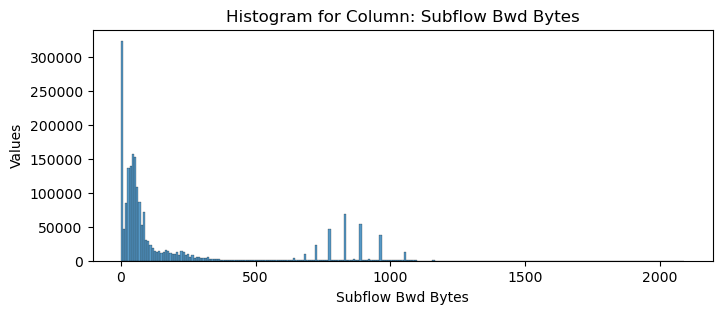

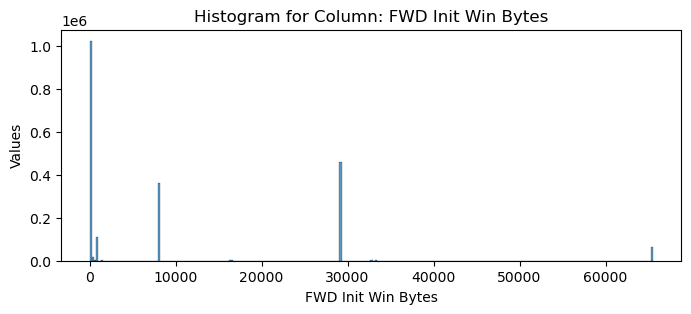

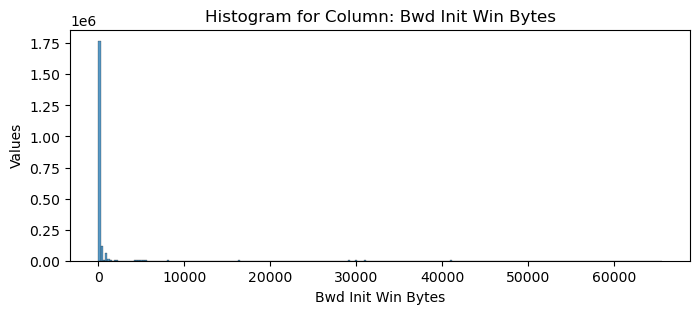

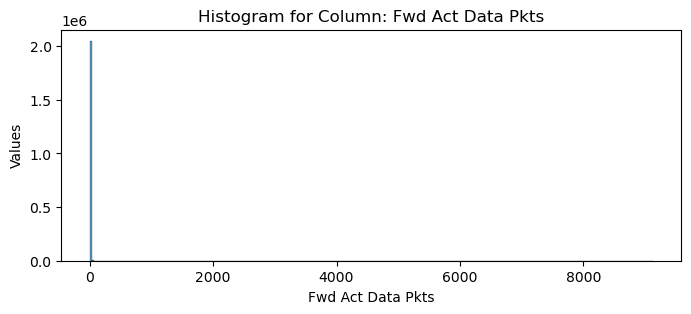

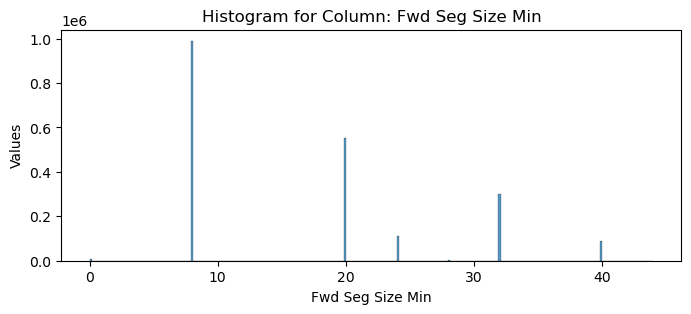

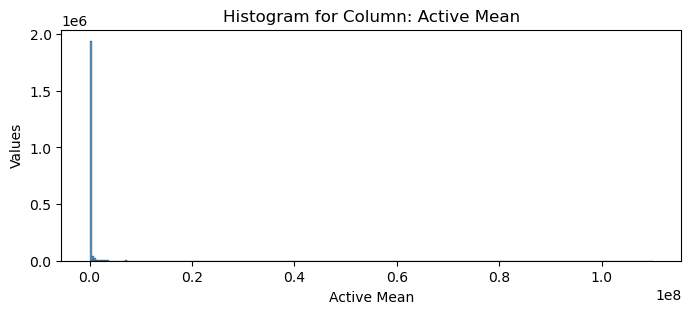

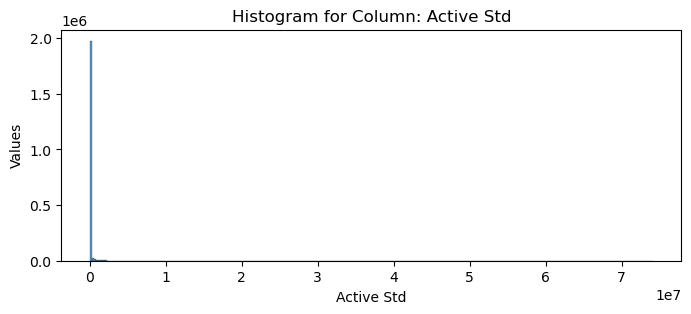

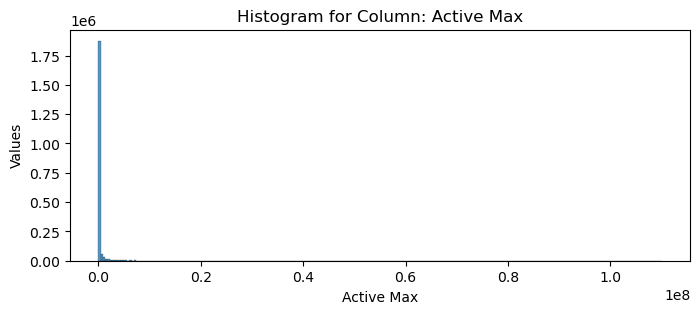

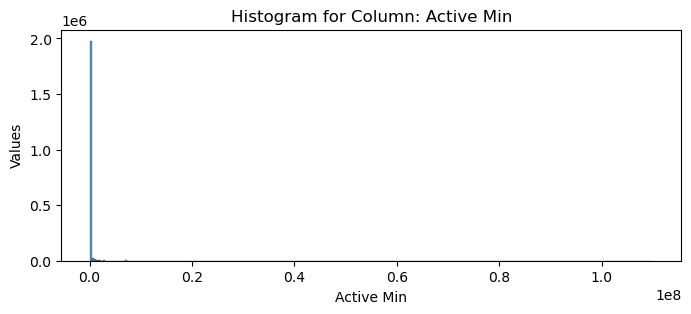

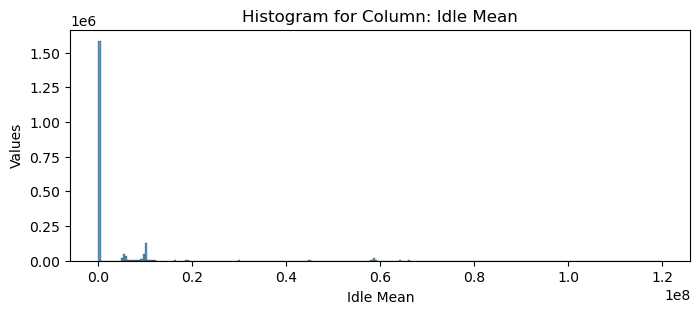

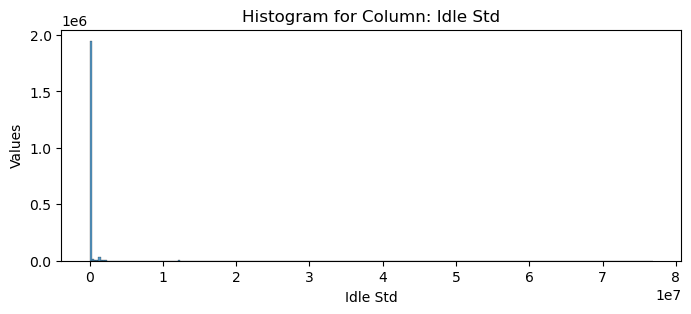

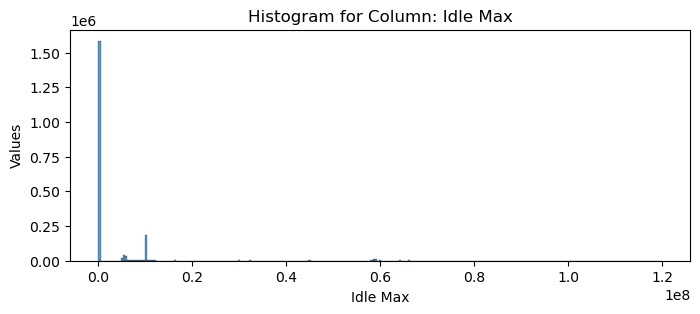

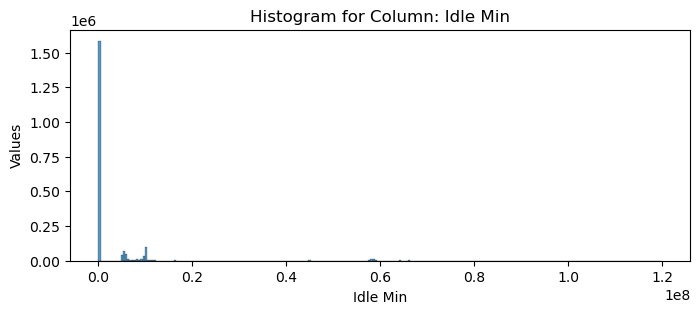

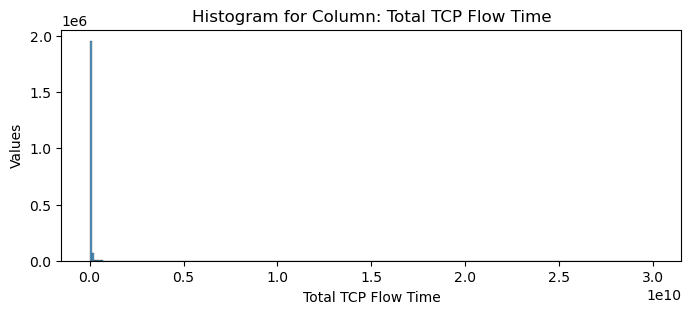

In [11]:
for col in numeric_columns:
    plt.figure(figsize=(8, 3))
    sns.histplot(x=clean_data[col],bins=np.histogram_bin_edges(clean_data[col], bins='rice'))
    plt.title(f'Histogram for Column: {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()

In [12]:
#Creating a dataframe to hold simple statistics of our variables
stats=pd.DataFrame()
stats = clean_data[numeric_columns].describe()
stats = stats.T
stats['Var'] = clean_data[numeric_columns].var()
stats.T

,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd RST Flags,Bwd RST Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time
count,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06,2.053039e+06
mean,1.095359e+03,1.130212e+01,1.272180e+07,1.212226e+01,1.405398e+01,5.470168e+02,2.236761e+04,2.146322e+02,2.136563e+01,5.095078e+01,6.216678e+01,1.260133e+03,5.468261e+01,4.199890e+02,4.805636e+02,1.669109e+05,9.326449e+03,9.806311e+05,1.773229e+06,5.032713e+06,1.263684e+05,1.265054e+07,2.162724e+06,1.372518e+06,5.000808e+06,1.339226e+06,1.189255e+07,2.208505e+06,1.209514e+06,4.484064e+06,1.391850e+06,1.362701e+00,1.731565e+00,2.853049e-01,1.251978e-01,2.848771e+02,3.214428e+02,4.669877e+03,4.656571e+03,2.099463e+01,1.298404e+03,2.170517e+02,3.907217e+02,5.963342e+05,6.768990e-01,9.028411e-01,4.116332e-01,3.094267e+00,2.436754e+01,4.369133e-04,6.707130e-04,9.268717e-01,2.170517e+02,5.095078e+01,4.199890e+02,6.126444e+01,7.087396e-02,1.978907e+04,4.151706e+03,2.073938e+00,2.544378e+06,7.218567e-03,2.634433e+01,6.332076e-06,1.901165e+02,1.024771e+04,7.711841e+02,1.760351e+00,1.696102e+01,1.305865e+05,6.021181e+04,2.326811e+05,9.610293e+04,4.534270e+06,2.963275e+05,4.783296e+06,4.240050e+06,3.224774e+07
std,5.412126e+03,5.503428e+00,3.132242e+07,8.802602e+02,1.171147e+03,1.056061e+04,2.657167e+06,4.955222e+02,3.511450e+01,9.635976e+01,1.574958e+02,2.273402e+03,7.475021e+01,6.766475e+02,9.789409e+02,5.404302e+05,5.852626e+04,4.175907e+06,6.231802e+06,1.463364e+07,2.490732e+06,3.115303e+07,1.013262e+07,4.197744e+06,1.463256e+07,9.849267e+06,3.099059e+07,1.012673e+07,4.390440e+06,1.437896e+07,9.688432e+06,8.383887e+00,2.572188e+01,8.765128e-01,3.398642e-01,1.840329e+04,2.346728e+04,2.927216e+04,2.926181e+04,2.550745e+01,2.287989e+03,2.963084e+02,6.649119e+02,1.579240e+06,9.492487e-01,1.015579e+00,9.149477e-01,2.835255e+01,2.050947e+03,2.959851e-02,4.044332e-02,2.312058e-01,2.963084e+02

This simple but effective manner of analysing indivudual variables has allowed us to learn the following, which we might use for interpreting and building our model. 

1. Variance in Features: Several features have a large variance (e.g., Flow Duration, Total Fwd Packet, Total Bwd packets). High variance in features can lead to challenges in some machine learning algorithms, especially those sensitive to scale. It might be necessary to perform feature scaling or normalization to improve model performance.

2. Skewed Distribution: Some features may have a highly skewed distribution (e.g., Fwd Packet Length Std, Bwd Packet Length Mean). Skewed data can impact the performance of certain machine learning models, especially those that assume a normal distribution. Applying appropriate transformations or using models robust to skewness may be beneficial.

3. Presence of Outliers: The maximum values of some features appear to be significantly different from the mean (e.g., Flow Duration, Total Length of Fwd Packet). Outliers can have a detrimental effect on model training. Treating or removing outliers might be necessary to build robust models.

4. Many Zeroes: Several features seem to have a significant number of zero values (e.g., Fwd IAT Total, Bwd IAT Total). Such features can affect the model's ability to generalize well. However due to the nature of packets and the way they are structured these 0's are inevitable.

## Bivariate Analysis

Following our univariate analysis it is important to understand how our features relate to on another, or how our different types of attacks show some sign of clustering so that our models are able to hang on to importan features to classify them differently. In this section we will look at how the data clusters through PCA, how our features correlate.

In [13]:
#Applying scaling to better visualize the data clusters
pt =  PowerTransformer()
t_data  = pt.fit_transform(clean_data[numeric_columns])

#Applying PCA to visualize data in 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(t_data)

In [14]:
# Create a DataFrame with PCA results and labels
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
pca_df['Label'] = clean_data['Label']

In [15]:
# Setting colors manualy for better visibility
label_colors = {
    'BENIGN': '#440154',
    'PortScan': '#482878',
    'DoS Hulk': '#3E4989',
    'DDoS': '#31688E',
    'Port_scan': '#26828E',
    'DoS GoldenEye': '#1F9E89',
    'DoS slowloris': '#35B779',
    'FTP-Patator': '#6DCD59',
    'SSH-Patator': '#B1DE29',
    'DoS Slowhttptest': '#FDE725',
    'Bot': '#FADE26',
    'Web Attack - Brute Force': '#F9A729',
    'Infiltration': '#F6772D',
    'Web Attack - XSS': '#DD4124',
    'Web Attack - Sql Injection': '#9F1D20',
    'Heartbleed': '#FF5733'
}


In [16]:

# Update label names for different web attacks to include unique identifiers otherwise plotly combines them into a single label
pca_df['Label'] = pca_df['Label'].replace({
    'Web Attack - Brute Force': 'Web-BruteForce',
    'Web Attack - XSS': 'Web-XSS',
    'Web Attack - Sql Injection': 'Web-SqlInjection'
})

# Create the scatter plot using Plotly
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Label', color_discrete_map=label_colors, hover_name='Label')

# Save the interactive plot as an HTML file
output_file = 'visuals/interactive_plot.html'
fig.write_html(output_file)

To prevent notebook crashes, I chose to display the plot instead of loading it directly. For those interested in exploring each cluster individually, this notebook generates an HTML file containing an interactive plot.

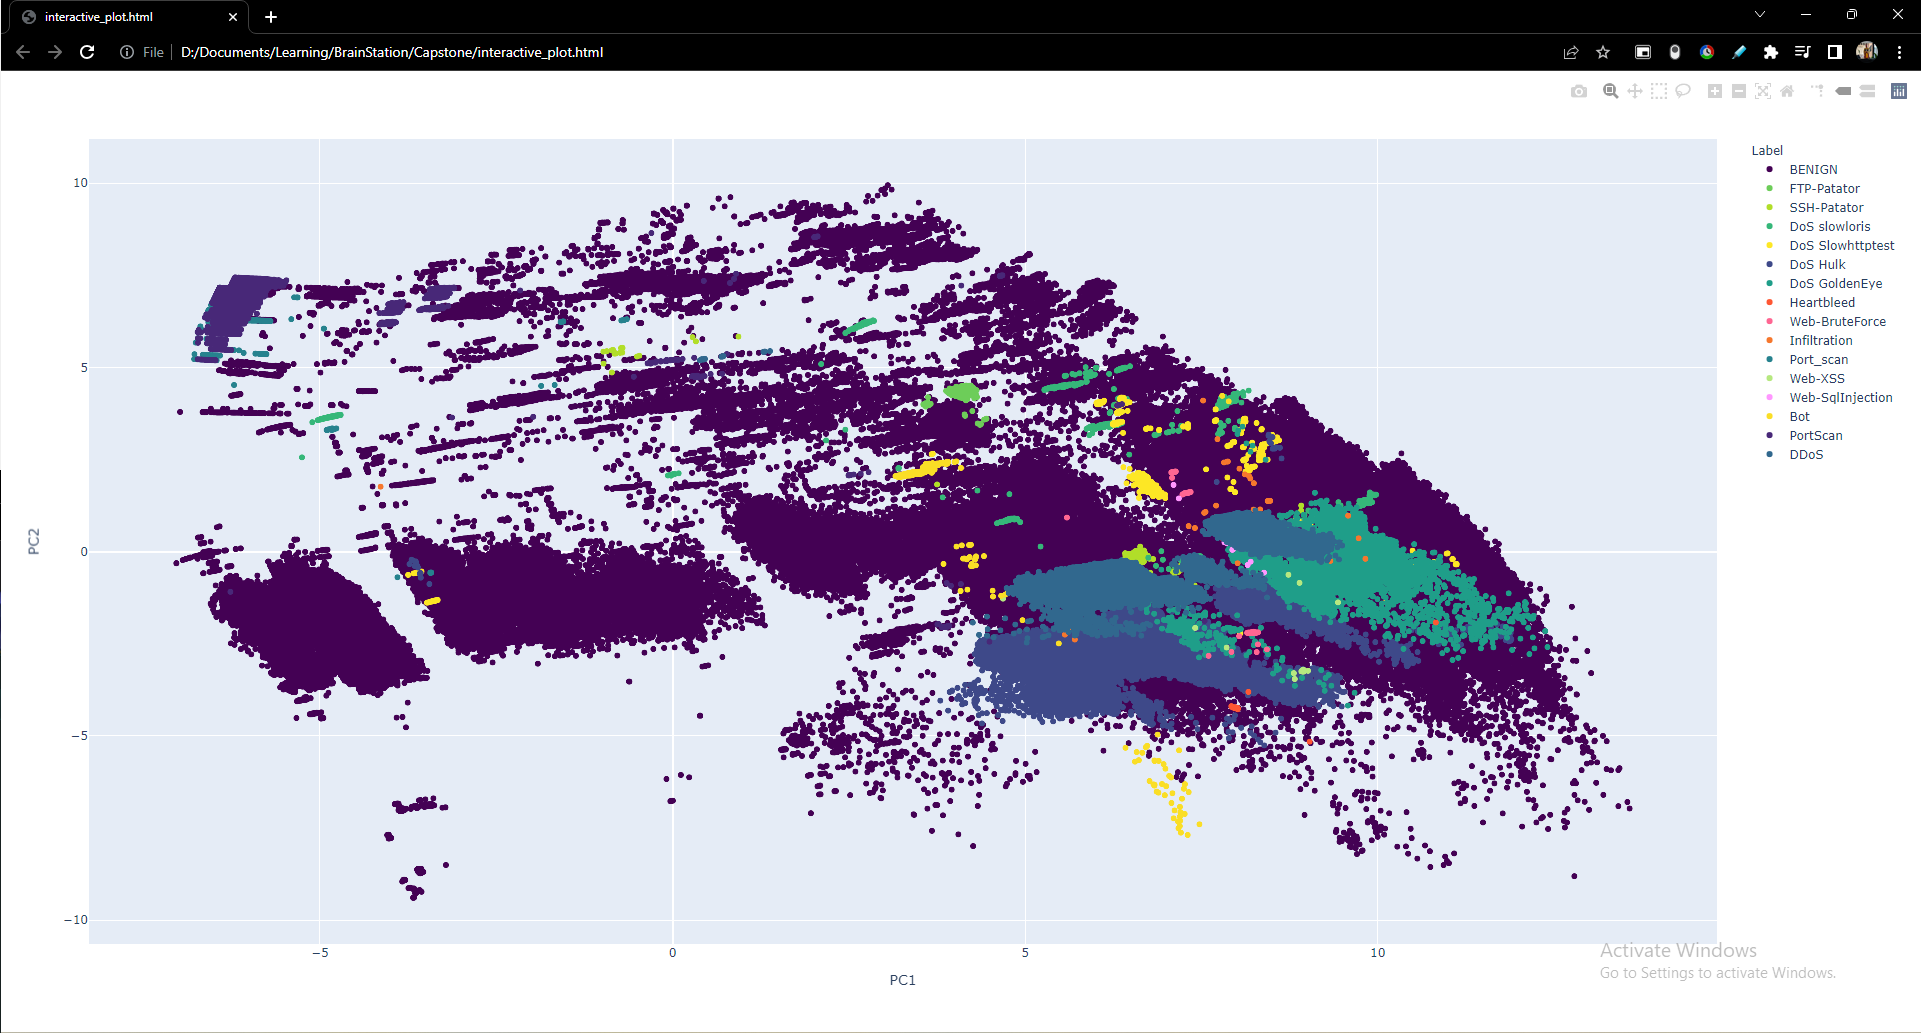

By employing PCA, we have successfully transformed our data into a viewable format. While individual Principal Components may not provide significant insights about our data, visualizing how each distinct attack clusters in a specific manner is crucial. This visualization reveals clear differences that our model can learn from. Although we may not be able to visualize each attack's specific clustering pattern directly, understanding that each attack clusters differently is valuable information for our modeling and classification efforts. It highlights the distinct characteristics of various attacks, allowing our model to learn and make informed decisions based on these differences.

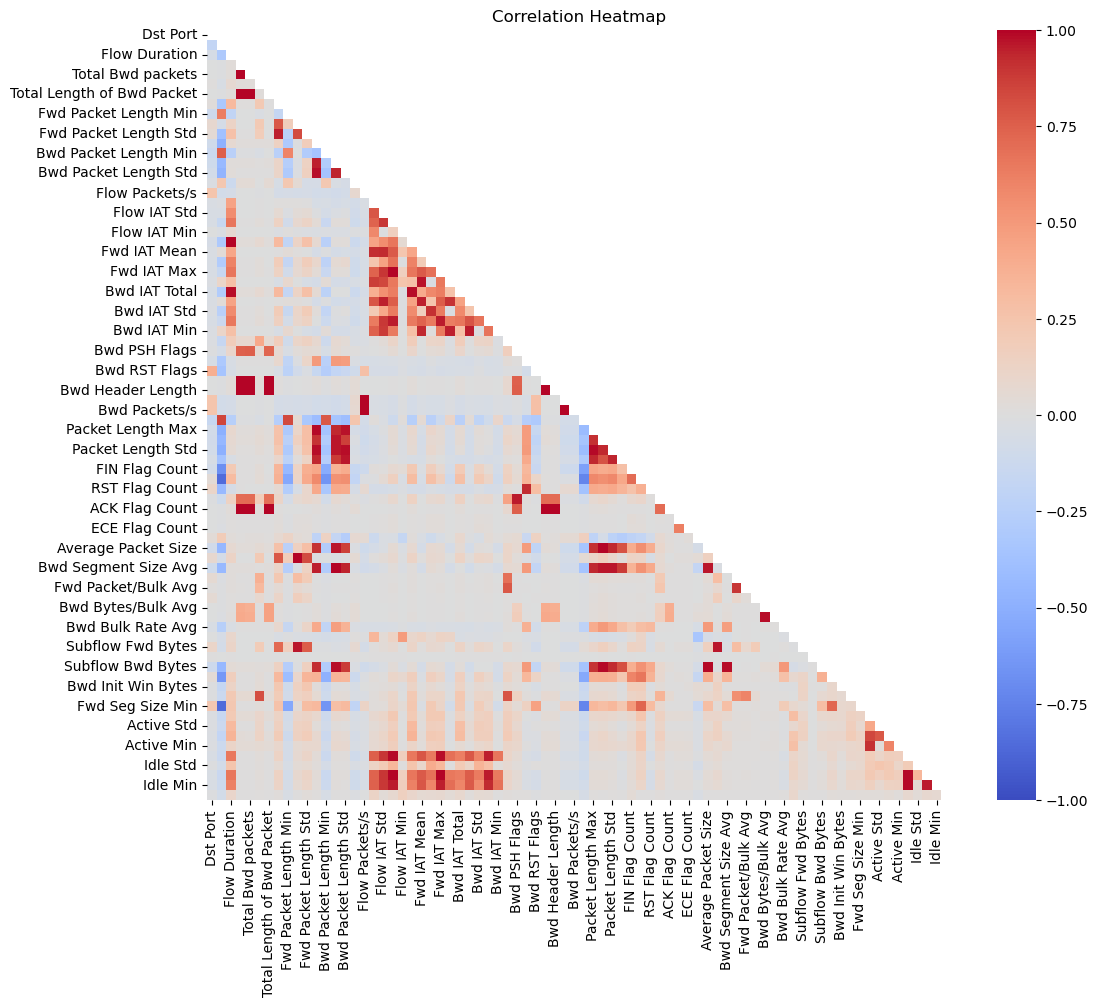

In [17]:
corr_df = clean_data.corr(numeric_only=True)
mask_ut = np.triu(np.ones(corr_df.shape)).astype(bool)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, cmap='coolwarm', fmt='.2f', vmin=-1.0, vmax=1.0,mask=mask_ut)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap reveals significant colinearity in our data, indicating the need for L2 (Lasso) Regularization to mitigate its impact on our base models. While colinearity may slightly affect our predictions, its presence makes the interpretation of more basic models more challenging. By employing L2 Regularization, we can effectively reduce the influence of colinearity, allowing for more reliable predictions and model interpretability.

# Data Wrangling

Having thoroughly examined our data, we now have a clearer understanding of the challenges we need to address during the modeling stage. To enhance our chances of obtaining an accurate model capable of predicting whether a connection is `BENIGN` or `MALIGNANT`, we will focus on data wrangling.

My primary goal in this data wrangling stage is to reduce the number of labels, thereby increasing the sample size available for our model to learn from, while preserving the underlying data distributions. Additionally, we will create a train and test set that are well-suited for our modeling purposes.

## Feature engineering

During our exploratory data analysis (EDA), we observed an abundance of different types of attacks, but they appeared in much smaller numbers compared to the `BENIGN` connections. This imbalance could potentially hinder our model's ability to discern patterns and accurately identify `MALIGNANT` connections. To address this issue, I made the decision to combine all the different types of attacks into a single cluster representing `MALIGNANT` connections. This transformation aims to improve our model's learning capabilities and enhance its predictive performance. Here is the transformation:

In [6]:
#Creating a new column 'Class' to represent the overal type of connection (0 = BENIGN, 1 = MALIGNANT)
clean_data['Class'] = np.where(clean_data['Label'] == 'BENIGN', 0,1)

In [7]:
clean_data['Class'].unique()

array([0, 1])

In [8]:
#Sanity Check 
clean_data[['Label','Class']].sample(3)

,Label,Class
1298202,Port_scan,1
1817561,PortScan,1
252638,BENIGN,0


## Test Train Split

Now that we have sorted out all our features, we can proceed with creating the train and test datasets. It's essential to consider the key findings from our exploratory data analysis (EDA):

1. Skewed Distribution: Our target variable, `clean_data['Class']`, exhibits a skewed class distribution. To address this, we should ensure that our test set maintains this skew, while taking steps to address it in our train set. This way, our model is not biased by the skewed distribution during training.

2. Stratifying our `MALIGNANT` class: Since the `MALIGNANT` class comprises all different types of attacks on our network, it is crucial to preserve the distribution of these attacks in both the train and test sets. By doing so, we ensure that our model is exposed to the same types of attacks it might encounter when deployed.

In [9]:
#Separating our target variable
X = clean_data.drop(columns=['Label','Class'])
y = clean_data['Class']

In [10]:
#Creating our train/test sets while maintaining the distribution of attacks the same
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=clean_data['Label'],random_state=123)

We need to conduct several checks to ensure that both our test data and train data are suitable for their respective purposes. 

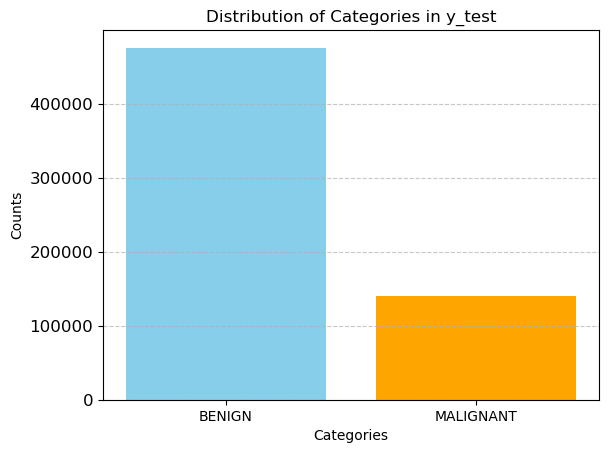

In [11]:
# Creating the bar plot check for imbalance in test set
plt.bar(x=[0,1], height=y_test.value_counts(),color = ['skyblue','orange'])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of Categories in y_test')

# Customizing the plot appearance
plt.xticks([0,1], ['BENIGN', 'MALIGNANT'])
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [12]:
print(f'Ratio of BENIGN to MALIGNANT datapoints {round(y_test.value_counts()[1]/y_test.value_counts()[0],3)}')

Ratio of BENIGN to MALIGNANT datapoints 0.294


In [13]:
#Combining back our target variable with the rest of our features to export the dataset
test_df = pd.concat([X_test,y_test],axis=1)
test_df.head()

,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd RST Flags,Bwd RST Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Class
973301,53,17,184,1,1,41.0,120.0,41.0,41.0,41.000000,0.000000,120.0,120.0,120.000000,0.000000,875000.000000,10869.565430,1.840000e+02,0.000000e+00,184.0,184.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,0,8,8,5434.782715,5434.782715,41.0,120.0,80.500000,55.861435,3.120500e+03,0,0,0,0,0,0,0,1.000000,80.500000,41.000000,120.000000,0,0,0,0,0,0,0,20,0,60,0,0,0,8,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0
357521,443,6,115557069,22,17,3044.0,1622.0,2445.0,0.0,138.363632,526.791626,1450.0,0.0,95.411766,350.765594,40.378319,0.337496,3.040976e+06,4.582348e+06,10000972.0,1.0,115557072.0,5.502718e+06,4.978196e+06,10016011.0,3.0,115541872.0,7221367.0,4.453157e+06,10016143.0,1.0,4,3,2,0,688,552,0.190382,0.147113,0.0,2445.0,119.641029,453.465393,2.056309e+05,2,2,2,7,36,0,0,0.772727,119.641029,138.363632,95.411766,0,0,0,0,0,0,0,78,0,41,29200,70,4,20,18846.583984,12712.909180,59215.0,15030.0,9609637.0,1.354586e+06,10000972.0,5308249.0,115557069,0
222742,443,6,103677138,21,20,1201.0,6928.0,522.0,0.0,57.190475,157.691345,1976.0,0.0,346.399994,603.844055,78.406868,0.395458,2.591928e+06,4.370888e+06,10024998.0,8.0,103677136.0,5.183857e+06,5.029754e+06,10048023.0,202.0,103653928.0,5455470.0,5.017184e+06,10048188.0,50.0,3,5,0,0,692,648,0.202552,0.192907,0.0,1976.0,198.268295,455.029602,2.070520e+05,2,2,0,8,40,0,0,0.952381,198.268295,57.190475,346.399994,0,0,0,2056,4,39125,0,29,0,168,29200,290,3,32,35139.500000,38053.367188,143441.0,22998.0,10022218.0,8.462487e+03,10024998.0,9998135.0,103677138,0
1060585,53,17,47041,1,1,37.0,222.0,37.0,37.0,37.000000,0.000000,222.0,222.0,222.000000,0.000000,5505.835449,42.516102,4.704100e+04,0.000000e+00,47041.0,47041.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,0,8,8,21.258051,21.258051,37.0,222.0,129.500000,130.814758,1.711250e+04,0,0,0,0,0,0,0,1.000000,129.500000,37.000000,222.000000,0,0,0,0,0,0,0,18,0,111,0,0,0,8,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0
783785,80,6,176993,8,7,415.0,11595.0,415.0,0.0,51.875000,146.724655,5792.0,0.0,1656.428589,2119.480225,67855.789062,84.749115,1.264236e+04,3.707213e+04,140225.0,1.0,176993.0,2.528471e+04,5.618134e+04,151988.0,1.0,163980.0,27330.0,5.559930e+04,140225.0,46.0,1,1,3,0,228,232,45.199528,39.549587,0.0,5792.0,800.666687,1619.428589,2.622549e+06,2,2,3,2,11,0,0,0.875000,800.666687,51.875000,1656.428589,0,0,0,11595,4,36809523,0,27,0,773,29200,235,1,20,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,176993,1


In [14]:
#Sanity Check
clean_data.loc[[test_df.iloc[4].name]]

,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd RST Flags,Bwd RST Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label,Class
783785,80,6,176993,8,7,415.0,11595.0,415.0,0.0,51.875,146.724655,5792.0,0.0,1656.428589,2119.480225,67855.789062,84.749115,12642.357422,37072.132812,140225.0,1.0,176993.0,25284.714844,56181.339844,151988.0,1.0,163980.0,27330.0,55599.304688,140225.0,46.0,1,1,3,0,228,232,45.199528,39.549587,0.0,5792.0,800.666687,1619.428589,2622548.75,2,2,3,2,11,0,0,0.875,800.666687,51.875,1656.428589,0,0,0,11595,4,36809523,0,27,0,773,29200,235,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176993,DoS Hulk,1


In [15]:
#Exporting trainset as is
test_df.to_csv('processed/Test.csv',index=False)

With our test set fully processed, let's focus on revising our train set. The primary objective of this set is to be as supportive as possible for our modeling efforts. As we noticed earlier, one of the significant downsides of our data is the class imbalance. To address this issue, we will downsample our BENIGN class, achieving a balanced 50/50 split of classes. This approach will facilitate our models in learning the underlying patterns of our data more effectively.

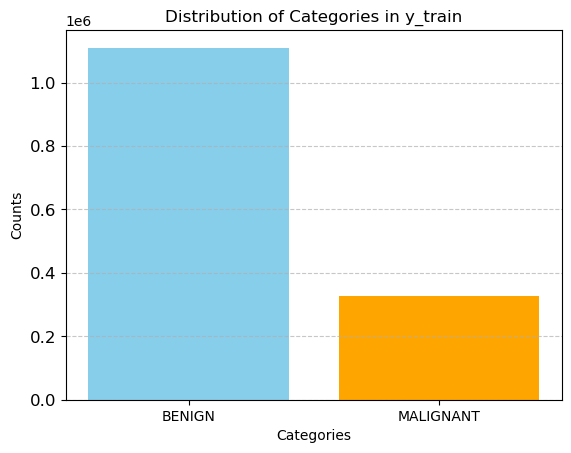

In [16]:
#Showing class imbalance before processing

# Creating the bar plot check for imbalance in train set
plt.bar(x=[0,1], height=y_train.value_counts(),color = ['skyblue','orange'])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of Categories in y_train')

# Customizing the plot appearance
plt.xticks([0,1], ['BENIGN', 'MALIGNANT'])
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [17]:
print(f'Ratio of BENIGN to MALIGNANT datapoints {round(y_train.value_counts()[1]/y_train.value_counts()[0],3)}')

Ratio of BENIGN to MALIGNANT datapoints 0.294


In [18]:
#Combining X_train and y_train to downsample
train_df = pd.concat([X_train,y_train],axis=1)
train_df.head(6)

,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd RST Flags,Bwd RST Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Class
162152,443,6,5185880,9,8,591.0,3212.0,342.0,0.0,65.666664,122.157684,1677.0,0.0,401.500000,723.082275,7.333375e+02,3.278132,324117.500000,1.194683e+06,4802046.0,1.0,5185880.0,648235.000000,1.679124e+06,4802046.0,3.0,5101728.0,728818.312500,1.851875e+06,4927510.0,1.0,3,2,0,0,192,168,1.735482,1.542650,0.0,1677.0,223.705887,515.811829,2.660618e+05,2,2,0,5,16,0,0,0.888889,223.705887,65.666664,401.500000,0,0,0,0,0,0,0,34,0,188,8192,4971,3,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5185880,0
1583035,53,17,68928,1,1,49.0,156.0,49.0,49.0,49.000000,0.000000,156.0,156.0,156.000000,0.000000,2.974118e+03,29.015785,68928.000000,0.000000e+00,68928.0,68928.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0,0,0,0,8,8,14.507893,14.507893,49.0,156.0,102.500000,75.660423,5.724500e+03,0,0,0,0,0,0,0,1.000000,102.500000,49.000000,156.000000,0,0,0,0,0,0,0,24,0,78,0,0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1430004,53,17,142,1,1,39.0,55.0,39.0,39.0,39.000000,0.000000,55.0,55.0,55.000000,0.000000,6.619718e+05,14084.506836,142.000000,0.000000e+00,142.0,142.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0,0,0,0,8,8,7042.253418,7042.253418,39.0,55.0,47.000000,11.313708,1.280000e+02,0,0,0,0,0,0,0,1.000000,47.000000,39.000000,55.000000,0,0,0,0,0,0,0,19,0,27,0,0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
995787,53,17,801,1,1,42.0,96.0,42.0,42.0,42.000000,0.000000,96.0,96.0,96.000000,0.000000,1.722846e+05,2496.878906,801.000000,0.000000e+00,801.0,801.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0,0,0,0,8,8,1248.439453,1248.439453,42.0,96.0,69.000000,38.183765,1.458000e+03,0,0,0,0,0,0,0,1.000000,69.000000,42.000000,96.000000,0,0,0,0,0,0,0,21,0,48,0,0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1720402,53,17,158,1,1,75.0,187.0,75.0,75.0,75.000000,0.000000,187.0,187.0,187.000000,0.000000,1.658228e+06,12658.227539,158.000000,0.000000e+00,158.0,158.0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0,0,0,0,0,8,8,6329.113770,6329.113770,75.0,187.0,131.000000,79.195961,6.272000e+03,0,0,0,0,0,0,0,1.000000,131.000000,75.000000,187.000000,0,0,0,0,0,0,0,37,0,93,0,0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
780573,80,6,61980,8,7,326.0,11595.0,326.0,0.0,40.750000,115.258408,5792.0,0.0,1656.428589,2120.732178,1.923362e+05,242.013550,4427.143066,8.609628e+03,31118.0,1.0,61980.0,8854.286133,1.479858e+04,40989.0,1.0,51839.0,8639.833008,1.207288e+04,31118.0,46.0,1,1,3,0,228,232,129.073898,112.939659,0.0,5792.0,794.733337,1621.806274,2.630256e+06,2,2,3,2,11,0,0,0.875000,794.733337,40.750000,1656.428589,0,0,0,11595,4,32388268,0,21,0,773,29200,235,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61980,1


In [19]:
#Sanity Check
clean_data.loc[[train_df.iloc[0].name]]

,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd RST Flags,Bwd RST Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Label,Class
162152,443,6,5185880,9,8,591.0,3212.0,342.0,0.0,65.666664,122.157684,1677.0,0.0,401.5,723.082275,733.337463,3.278132,324117.5,1194683.125,4802046.0,1.0,5185880.0,648235.0,1679124.0,4802046.0,3.0,5101728.0,728818.3125,1851875.375,4927510.0,1.0,3,2,0,0,192,168,1.735482,1.54265,0.0,1677.0,223.705887,515.811829,266061.84375,2,2,0,5,16,0,0,0.888889,223.705887,65.666664,401.5,0,0,0,0,0,0,0,34,0,188,8192,4971,3,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5185880,BENIGN,0


In [20]:
#Downsampling BENIGN data
train_attack_df = train_df[train_df['Class'] == 1]
train_benign_df = train_df[train_df['Class'] == 0]

train_benign_downsample = resample(train_benign_df, n_samples=len(train_attack_df), random_state=123)

In [21]:
train_ds_df = pd.concat([train_attack_df,train_benign_downsample])
train_ds_df.sample(5)

,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd RST Flags,Bwd RST Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Total TCP Flow Time,Class
687627,443,6,5431751,10,10,354.0,6611.0,197.0,0.0,35.400002,69.213356,1460.0,0.0,661.099976,695.823669,1282.275269,3.682054,285881.625,1.147386e+06,5019936.0,1.0,5431751.0,603527.875,1.658005e+06,5019936.0,1.0,5380792.0,597865.75,1.752017e+06,5269487.0,48.0,3,4,1,0,212,212,1.841027,1.841027,0.0,1460.0,348.250000,578.480408,3.346396e+05,2,2,1,7,19,0,0,1.000,348.250000,35.400002,661.099976,0,0,0,6529,5,4306728,0,17,0,330,8192,110,3,20,360918.000000,0.000000,360918.0,360918.0,5019936.0,0.00000,5019936.0,5019936.0,5431751,0
463656,53,17,32924,1,1,43.0,97.0,43.0,43.0,43.000000,0.000000,97.0,97.0,97.000000,0.000000,4252.217285,60.745960,32924.000,0.000000e+00,32924.0,32924.0,0.0,0.000,0.000000e+00,0.0,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,0,0,0,8,8,30.372980,30.372980,43.0,97.0,70.000000,38.183765,1.458000e+03,0,0,0,0,0,0,0,1.000,70.000000,43.000000,97.000000,0,0,0,0,0,0,0,21,0,48,0,0,0,8,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0,0
1641382,80,6,136017,8,5,20.0,11595.0,20.0,0.0,2.500000,7.071068,5840.0,0.0,2319.000000,2438.258545,85393.734375,95.576286,11334.750,2.856809e+04,96031.0,1.0,136017.0,19431.000,3.625292e+04,96031.0,1.0,36748.0,9187.00,1.792587e+04,36075.0,46.0,1,1,1,0,172,112,58.816177,36.760113,0.0,5840.0,893.461548,1832.395264,3.357672e+06,1,2,1,2,12,0,0,0.625,893.461548,2.500000,2319.000000,0,0,0,0,0,0,0,1,0,891,8192,229,1,20,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,136017,1
401372,53,17,254647,1,1,46.0,62.0,46.0,46.0,46.000000,0.000000,62.0,62.0,62.000000,0.000000,424.116516,7.854010,254647.000,0.000000e+00,254647.0,254647.0,0.0,0.000,0.000000e+00,0.0,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,0,0,0,8,8,3.927005,3.927005,46.0,62.0,54.000000,11.313708,1.280000e+02,0,0,0,0,0,0,0,1.000,54.000000,46.000000,62.000000,0,0,0,0,0,0,0,23,0,31,0,0,0,8,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0,0
343865,443,6,60925862,16,16,678.0,5661.0,357.0,0.0,42.375000,100.869469,1448.0,0.0,353.812500,576.403015,104.044487,0.525229,1965350.375,4.040246e+06,10189456.0,6.0,60925864.0,4061724.250,5.120756e+06,10240025.0,114.0,60874880.0,4058325.25,5.123830e+06,10240240.0,48.0,3,5,0,0,520,520,0.262614,0.262614,0.0,1448.0,198.093750,436.709564,1.907152e+05,2,2,0,8,31,0,0,1.000,198.093750,42.375000,353.812500,0,0,0,5191,4,3066154,0,21,0,176,29200,66,3,32,69185.335938,45127.878906,161302.0,50567.0,10076549.0,201950.71875,10189456.0,9690717.0,60925862,0


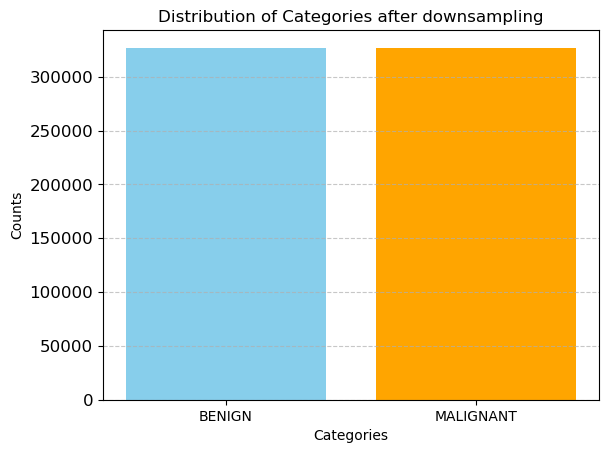

In [22]:
#Checking distribution of classes again after downsampling
downsample_counts = train_ds_df['Class'].value_counts()
# Creating the bar plot check for imbalance in train set
plt.bar(x=[0,1], height=downsample_counts,color = ['skyblue','orange'])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of Categories after downsampling')

# Customizing the plot appearance
plt.xticks([0,1], ['BENIGN', 'MALIGNANT'])
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [23]:
print(f'Ratio of BENIGN to MALIGNANT datapoints {round(downsample_counts[1]/downsample_counts[0],3)}')

Ratio of BENIGN to MALIGNANT datapoints 1.0


The decision to downsample the majority class was motivated by the need to mitigate the risk of overfitting the model. Overfitting could lead the model to memorize the characteristics of malignant connections rather than genuinely learning to detect attacks. By downsampling the majority class, we reduce the risk of overfitting and increase the model's ability to generalize to new, unseen network data. This precaution helps ensure that our model remains adaptable and can effectively detect various types of attacks, even on networks it was not directly trained on.

In [24]:
#Exporiting final train set
train_ds_df.to_csv('processed/Train.csv', index = False)